# Delo z CSV datotekami

Let’s face it: you need to get information into and out of your programs through more than just the keyboard and console. Exchanging information through text files is a common way to share info between programs. One of the most popular formats for exchanging data is the CSV format. But how do you use it?

Let’s get one thing clear: you don’t have to (and you won’t) build your own CSV parser from scratch. There are several perfectly acceptable libraries you can use. The Python csv library will work for most cases. If your work requires lots of data or numerical analysis, the pandas library has CSV parsing capabilities as well, which should handle the rest.



### What Is a CSV File?

A CSV file (Comma Separated Values file) is a type of plain text file that uses specific structuring to arrange tabular data. Because it’s a plain text file, it can contain only actual text data—in other words, printable ASCII or Unicode characters.

The structure of a CSV file is given away by its name. Normally, CSV files use a comma to separate each specific data value.

Notice how each piece of data is separated by a comma. Normally, the first line identifies each piece of data—in other words, the name of a data column. Every subsequent line after that is actual data and is limited only by file size constraints.

In general, the separator character is called a delimiter, and the comma is not the only one used. Other popular delimiters include the tab (\t), colon (:) and semi-colon (;) characters. Properly parsing a CSV file requires us to know which delimiter is being used.

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication.

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

### Parsing CSV Files With Python’s Built-in CSV Library

The csv library provides functionality to both read from and write to CSV files. Designed to work out of the box with Excel-generated CSV files, it is easily adapted to work with a variety of CSV formats. The csv library contains objects and other code to read, write, and process data from and to CSV files.

#### Reading CSV Files With csv

Reading from a CSV file is done using the reader object. The CSV file is opened as a text file with Python’s built-in open() function, which returns a file object. This is then passed to the reader, which does the heavy lifting.

Here’s code to read it:

In [ ]:
import csv

with open('data/employee_birthday.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are name, department, birthday month
	John Smith works in the Accounting department, and was born in November.
	Erica Meyers works in the IT department, and was born in March.
Processed 3 lines.


Each row returned by the reader is a list of String elements containing the data found by removing the delimiters. The first row returned contains the column names, which is handled in a special way.

#### Writing CSV Files With csv

You can also write to a CSV file using a writer object and the .write_row() method:

In [ ]:
import csv

with open('data/employee_file1.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',')

    employee_writer.writerow(['John Smith', 'Accounting', 'November'])
    employee_writer.writerow(['Erica Meyers', 'IT', 'March'])

## Uvod v pandas

> Namestimo pandas v virtualno okolje

<div><p>In the last two missions, we explored how the NumPy library makes working with data easier. Because we can easily work across multiple dimensions, our code is a lot easier to understand. By using vectorized operations instead of loops, our code runs faster with larger data.</p>
<p>Although NumPy provides fundamental structures and tools that make working with data easier, there are several things that limit its usefulness:</p>
<ul>
<li>The lack of support for column names forces us to frame questions as multi-dimensional array operations.</li>
<li>Support for only one data type per ndarray makes it more difficult to work with data that contains both numeric and string data.</li>
<li>There are lots of low level methods, but there are many common analysis patterns that don't have pre-built methods.</li>
</ul>
<p>The <strong>pandas</strong> library provides solutions to all of these pain points and more. Pandas is not so much a replacement for NumPy as an <em>extension</em> of NumPy. The underlying code for pandas uses the NumPy library extensively, which means the concepts you've been learning will come in handy as you begin to learn more about pandas.</p>
<p>The primary data structure in pandas is called a <a target="_blank" href="(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame)"><strong>dataframe</strong></a>. Dataframes are the pandas equivalent of a Numpy 2D ndarray, with a few key differences:</p>
<ul>
<li>Axis values can have string <strong>labels</strong>, not just numeric ones.</li>
<li>Dataframes can contain columns with <strong>multiple data types</strong>: including integer, float, and string.</li>
</ul>
</div>

### About pandas

Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful data structures. The name Pandas is derived from the word Panel Data – an Econometrics from Multidimensional data.

In 2008, developer Wes McKinney started developing pandas when in need of high performance, flexible tool for analysis of data.

Prior to Pandas, Python was majorly used for data munging and preparation. It had very little contribution towards data analysis. Pandas solved this problem. Using Pandas, we can accomplish five typical steps in the processing and analysis of data, regardless of the origin of data — load, prepare, manipulate, model, and analyze.

Python with Pandas is used in a wide range of fields including academic and commercial domains including finance, economics, Statistics, analytics, etc.

Key Features of Pandas
- Fast and efficient DataFrame object with default and customized indexing.
- Tools for loading data into in-memory data objects from different file formats.
- Data alignment and integrated handling of missing data.
- Reshaping and pivoting of date sets.
- Label-based slicing, indexing and subsetting of large data sets.
- Columns from a data structure can be deleted or inserted.
- Group by data for aggregation and transformations.
- High performance merging and joining of data.
- Time Series functionality.

Similar to the import convention for NumPy (import numpy as np), the import convention for pandas is:



In [ ]:
import pandas as pd

In [ ]:
f500 = pd.read_csv('data/f500.csv')

In [ ]:
f500.head(3)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523


> Pokažemo osnovne metode za pregled podatkov

### Reading and Writing Data with pandas

The pandas I/O API is a set of top level reader functions accessed like pandas.read_csv() that generally return a pandas object. The corresponding writer functions are object methods that are accessed like DataFrame.to_csv(). Below is a table containing available readers and writers.

[IO tools (text, CSV, HDF5, …)](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

<table class="colwidths-given table">
<colgroup>
<col style="width: 12%">
<col style="width: 40%">
<col style="width: 24%">
<col style="width: 24%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Format Type</p></th>
<th class="head"><p>Data Description</p></th>
<th class="head"><p>Reader</p></th>
<th class="head"><p>Writer</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>text</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a></p></td>
<td><p><a class="reference internal" href="#io-read-csv-table"><span class="std std-ref">read_csv</span></a></p></td>
<td><p><a class="reference internal" href="#io-store-in-csv"><span class="std std-ref">to_csv</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>text</p></td>
<td><p>Fixed-Width Text File</p></td>
<td><p><a class="reference internal" href="#io-fwf-reader"><span class="std std-ref">read_fwf</span></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>text</p></td>
<td><p><a class="reference external" href="https://www.json.org/">JSON</a></p></td>
<td><p><a class="reference internal" href="#io-json-reader"><span class="std std-ref">read_json</span></a></p></td>
<td><p><a class="reference internal" href="#io-json-writer"><span class="std std-ref">to_json</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>text</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/HTML">HTML</a></p></td>
<td><p><a class="reference internal" href="#io-read-html"><span class="std std-ref">read_html</span></a></p></td>
<td><p><a class="reference internal" href="#io-html"><span class="std std-ref">to_html</span></a></p></td>
</tr>
<tr class="row-even"><td><p>text</p></td>
<td><p>Local clipboard</p></td>
<td><p><a class="reference internal" href="#io-clipboard"><span class="std std-ref">read_clipboard</span></a></p></td>
<td><p><a class="reference internal" href="#io-clipboard"><span class="std std-ref">to_clipboard</span></a></p></td>
</tr>
<tr class="row-odd"><td></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a></p></td>
<td><p><a class="reference internal" href="#io-excel-reader"><span class="std std-ref">read_excel</span></a></p></td>
<td><p><a class="reference internal" href="#io-excel-writer"><span class="std std-ref">to_excel</span></a></p></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="http://www.opendocumentformat.org">OpenDocument</a></p></td>
<td><p><a class="reference internal" href="#io-ods"><span class="std std-ref">read_excel</span></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://support.hdfgroup.org/HDF5/whatishdf5.html">HDF5 Format</a></p></td>
<td><p><a class="reference internal" href="#io-hdf5"><span class="std std-ref">read_hdf</span></a></p></td>
<td><p><a class="reference internal" href="#io-hdf5"><span class="std std-ref">to_hdf</span></a></p></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://github.com/wesm/feather">Feather Format</a></p></td>
<td><p><a class="reference internal" href="#io-feather"><span class="std std-ref">read_feather</span></a></p></td>
<td><p><a class="reference internal" href="#io-feather"><span class="std std-ref">to_feather</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://parquet.apache.org/">Parquet Format</a></p></td>
<td><p><a class="reference internal" href="#io-parquet"><span class="std std-ref">read_parquet</span></a></p></td>
<td><p><a class="reference internal" href="#io-parquet"><span class="std std-ref">to_parquet</span></a></p></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="//https://orc.apache.org/">ORC Format</a></p></td>
<td><p><a class="reference internal" href="#io-orc"><span class="std std-ref">read_orc</span></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://msgpack.org/index.html">Msgpack</a></p></td>
<td><p><a class="reference internal" href="#io-msgpack"><span class="std std-ref">read_msgpack</span></a></p></td>
<td><p><a class="reference internal" href="#io-msgpack"><span class="std std-ref">to_msgpack</span></a></p></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/Stata">Stata</a></p></td>
<td><p><a class="reference internal" href="#io-stata-reader"><span class="std std-ref">read_stata</span></a></p></td>
<td><p><a class="reference internal" href="#io-stata-writer"><span class="std std-ref">to_stata</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/SAS_(software)">SAS</a></p></td>
<td><p><a class="reference internal" href="#io-sas-reader"><span class="std std-ref">read_sas</span></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/SPSS">SPSS</a></p></td>
<td><p><a class="reference internal" href="#io-spss-reader"><span class="std std-ref">read_spss</span></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>binary</p></td>
<td><p><a class="reference external" href="https://docs.python.org/3/library/pickle.html">Python Pickle Format</a></p></td>
<td><p><a class="reference internal" href="#io-pickle"><span class="std std-ref">read_pickle</span></a></p></td>
<td><p><a class="reference internal" href="#io-pickle"><span class="std std-ref">to_pickle</span></a></p></td>
</tr>
<tr class="row-even"><td><p>SQL</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/SQL">SQL</a></p></td>
<td><p><a class="reference internal" href="#io-sql"><span class="std std-ref">read_sql</span></a></p></td>
<td><p><a class="reference internal" href="#io-sql"><span class="std std-ref">to_sql</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>SQL</p></td>
<td><p><a class="reference external" href="https://en.wikipedia.org/wiki/BigQuery">Google BigQuery</a></p></td>
<td><p><a class="reference internal" href="#io-bigquery"><span class="std std-ref">read_gbq</span></a></p></td>
<td><p><a class="reference internal" href="#io-bigquery"><span class="std std-ref">to_gbq</span></a></p></td>
</tr>
</tbody>
</table>

### Parsing CSV Files With the pandas Library

Of course, the Python CSV library isn’t the only game in town. Reading CSV files is possible in pandas as well. It is highly recommended if you have a lot of data to analyze.

pandas is an open-source Python library that provides high performance data analysis tools and easy to use data structures. pandas is available for all Python installations, but it is a key part of the Anaconda distribution and works extremely well in Jupyter notebooks to share data, code, analysis results, visualizations, and narrative text.

Reading the CSV into a pandas DataFrame is quick and straightforward:

In [ ]:
import pandas
df = pandas.read_csv('data/hrdata.csv')
df

,Name,Hire Date,Salary,Sick Days remaining
0,Graham Chapman,03/15/14,50000.0,10
1,John Cleese,06/01/15,65000.0,8
2,Eric Idle,05/12/14,45000.0,10
3,Terry Jones,11/01/13,70000.0,3
4,Terry Gilliam,08/12/14,48000.0,7
5,Michael Palin,05/23/13,66000.0,8


That’s it: three lines of code, and only one of them is doing the actual work. pandas.read_csv() opens, analyzes, and reads the CSV file provided, and stores the data in a DataFrame.

Wrinting data to json.

In [ ]:
df.to_json('data/hrdata.json', orient='index')

In [ ]:
! cat data/hrdata.json

{"0":{"Name":"Graham Chapman","Hire Date":"03\/15\/14","Salary":50000.0,"Sick Days remaining":10},"1":{"Name":"John Cleese","Hire Date":"06\/01\/15","Salary":65000.0,"Sick Days remaining":8},"2":{"Name":"Eric Idle","Hire Date":"05\/12\/14","Salary":45000.0,"Sick Days remaining":10},"3":{"Name":"Terry Jones","Hire Date":"11\/01\/13","Salary":70000.0,"Sick Days remaining":3},"4":{"Name":"Terry Gilliam","Hire Date":"08\/12\/14","Salary":48000.0,"Sick Days remaining":7},"5":{"Name":"Michael Palin","Hire Date":"05\/23\/13","Salary":66000.0,"Sick Days remaining":8}}

#### Primer 1: seaslug.txt

In [ ]:
seaslug = pd.read_csv('data/seaslug.txt', sep='\t')

In [ ]:
seaslug.head()

,Time,Percent
0,99,0.067
1,99,0.133
2,99,0.067
3,99,0.000
4,99,0.000


- `sep: str, defaults to ',' for read_csv(), \t for read_table()`: Delimiter to use. If sep is None, the C engine cannot automatically detect the separator, but the Python parsing engine can, meaning the latter will be used and automatically detect the separator by Python’s builtin sniffer tool, csv.Sniffer. In addition, separators longer than 1 character and different from '\s+' will be interpreted as regular expressions and will also force the use of the Python parsing engine. Note that regex delimiters are prone to ignoring quoted data. Regex example: '\\r\\t'.

- `delimiter: str, default None`: Alias for sep.

#### Primer 2: FOOD_DES.txt

Encoding: `iso-8859-1`, separator: `^`

In [ ]:
! head -n 3 ./data/FOOD_DES.txt

~01001~^~0100~^~Butter, salted~^~BUTTER,WITH SALT~^~~^~~^~Y~^~~^0^~~^6.38^4.27^8.79^3.87

~01002~^~0100~^~Butter, whipped, with salt~^~BUTTER,WHIPPED,W/ SALT~^~~^~~^~Y~^~~^0^~~^6.38^^^

~01003~^~0100~^~Butter oil, anhydrous~^~BUTTER OIL,ANHYDROUS~^~~^~~^~Y~^~~^0^~~^6.38^4.27^8.79^3.87



- Turns out the file, instead of using commas to separate the fields, uses carets ^.
- By some reason, USDA people thought separating strings with tildes ~ was a good idea. Thankfully, we can use the quotechar argument

In [ ]:
pd.read_csv('data/FOOD_DES.txt', sep='^', encoding='iso-8859-1', header=None, nrows=5, quotechar='~')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1001,100,"Butter, salted","BUTTER,WITH SALT",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87
1,1002,100,"Butter, whipped, with salt","BUTTER,WHIPPED,W/ SALT",NaN,NaN,Y,NaN,0,NaN,6.38,NaN,NaN,NaN
2,1003,100,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87
3,1004,100,"Cheese, blue","CHEESE,BLUE",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87
4,1005,100,"Cheese, brick","CHEESE,BRICK",NaN,NaN,Y,NaN,0,NaN,6.38,4.27,8.79,3.87


- `nrows: int, default None` Number of rows of file to read. Useful for reading pieces of large files.

- `header: int or list of ints, default 'infer'` Row number(s) to use as the column names, and the start of the data. Default behavior is to infer the column names: if no names are passed the behavior is identical to header=0 and column names are inferred from the first line of the file, if column names are passed explicitly then the behavior is identical to header=None. Explicitly pass header=0 to be able to replace existing names.

- `encoding: str, default None` Encoding to use for UTF when reading/writing (e.g. 'utf-8'). [List of Python standard encodings](https://docs.python.org/3/library/codecs.html#standard-encodings).

- `quotechar: str (length 1)`: The character used to denote the start and end of a quoted item. Quoted items can include the delimiter and it will be ignored.

#### Primer 3: MplsStops.csv

In [ ]:
! head -n 3 ./data/mpls_stops.csv

Unnamed: 0,id Num,date,problem,MDC,citation Issued,person Search,vehicle Search,pre Race,race,gender,lat,long,police Precinct,neighborhood
,idNum,date,problem,MDC,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
6823.0,17-000003,2017-01-01 00:00:42,suspicious,MDC,,NO,NO,Unknown,Unknown,Unknown,44.96661711,-93.24645826,1,Cedar Riverside


In [ ]:
mpls = pd.read_csv('data/mpls_stops.csv', nrows=3)
mpls

,Unnamed: 0,id Num,date,problem,MDC,citation Issued,person Search,vehicle Search,pre Race,race,gender,lat,long,police Precinct,neighborhood
0,NaN,idNum,date,problem,MDC,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
1,6823.0,17-000003,2017-01-01 00:00:42,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Unknown,44.96661711,-93.24645826,1,Cedar Riverside
2,6824.0,17-000007,2017-01-01 00:03:07,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Male,44.98045,-93.27134,1,Downtown West


In [ ]:
mpls.columns

Index(['Unnamed: 0', 'id Num', 'date', 'problem', 'MDC', 'citation Issued',
       'person Search', 'vehicle Search', 'pre Race', 'race', 'gender', 'lat',
       'long', 'police Precinct', 'neighborhood'],
      dtype='object')

In [ ]:
new_column_names = ['Unnamed: 0', 'id Num', 'date', 'problem', 'MDC', 'citation Issued',
       'person Search', 'vehicle Search', 'pre Race', 'race', 'gender', 'lat',
       'long', 'police Precinct', 'neighborhood']

In [ ]:
new_column_names = [name.lower().replace(' ', '_') for name in new_column_names]
new_column_names[0] = 'case_number_id'
print(new_column_names)

['case_number_id', 'id_num', 'date', 'problem', 'mdc', 'citation_issued', 'person_search', 'vehicle_search', 'pre_race', 'race', 'gender', 'lat', 'long', 'police_precinct', 'neighborhood']


In [ ]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [ ]:
mpls = pd.read_csv('data/mpls_stops.csv', 
                   names=new_column_names, 
                   skiprows=2, 
                   engine='c',
                   true_values=['YES'],
                   false_values=['NO'],
                   dtype={'mdc': 'category', 'problem':'category', 'citation_issued': 'float',
                         'person_search': 'float', 'vehicle_search': 'float',  'pre_race':'category'},
                   index_col='case_number_id',
                   parse_dates=['date'],
                   date_parser=dateparse,
                   na_values=['Unknown'])

mpls.index = mpls.index.astype('int')
mpls.head()

,id_num,date,problem,mdc,citation_issued,person_search,vehicle_search,pre_race,race,gender,lat,long,police_precinct,neighborhood
case_number_id,,,,,,,,,,,,,,
6823,17-000003,2017-01-01 00:00:42,suspicious,MDC,1.0,0.0,0.0,NaN,NaN,NaN,44.966617,-93.246458,1,Cedar Riverside
6824,17-000007,2017-01-01 00:03:07,suspicious,MDC,1.0,0.0,0.0,NaN,NaN,Male,44.980450,-93.271340,1,Downtown West
6825,17-000073,2017-01-01 00:23:15,traffic,MDC,1.0,0.0,0.0,NaN,White,Female,44.948350,-93.275380,5,Whittier
6826,17-000092,2017-01-01 00:33:48,suspicious,MDC,1.0,0.0,0.0,NaN,East African,Male,44.948360,-93.281350,5,Whittier
6827,17-000098,2017-01-01 00:37:58,traffic,MDC,1.0,0.0,0.0,NaN,White,Female,44.979078,-93.262076,1,Downtown West


- `names: array-like, default None` List of column names to use. If file contains no header row, then you should explicitly pass header=None. Duplicates in this list are not allowed.


- `skiprows: list-like or integer, default None` Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.

- `engine: {'c', 'python'}` Parser engine to use. The C engine is faster while the Python engine is currently more feature-complete.

In [ ]:
%timeit mpls = pd.read_csv('data/mpls_stops.csv', names=new_column_names, skiprows=2, engine='python')

776 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit mpls = pd.read_csv('data/mpls_stops.csv', names=new_column_names, skiprows=2, engine='c')

193 ms ± 3.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- `true_values: list, default None` Values to consider as True.
- `false_values: list, default None` Values to consider as False.

- `index_col: int, str, sequence of int / str, or False, default None` Column(s) to use as the row labels of the DataFrame, either given as string name or column index. If a sequence of int / str is given, a MultiIndex is used.

- `dtype: Type name or dict of column -> type, default None` Data type for data or columns. E.g. {'a': np.float64, 'b': np.int32} (unsupported with engine='python'). Use str or object together with suitable na_values settings to preserve and not interpret dtype.

- `parse_dates: boolean or list of ints or names or list of lists or dict, default False.` 
    - If True -> try parsing the index.
    - If [1, 2, 3] -> try parsing columns 1, 2, 3 each as a separate date column.
    - If [[1, 3]] -> combine columns 1 and 3 and parse as a single date column.
    - If {'foo': [1, 3]} -> parse columns 1, 3 as date and call result ‘foo’. A fast-path exists for iso8601-formatted dates.

- `date_parserfunction, default None` Function to use for converting a sequence of string columns to an array of datetime instances. The default uses dateutil.parser.parser to do the conversion. pandas will try to call date_parser in three different ways, advancing to the next if an exception occurs: 1) Pass one or more arrays (as defined by parse_dates) as arguments; 2) concatenate (row-wise) the string values from the columns defined by parse_dates into a single array and pass that; and 3) call date_parser once for each row using one or more strings (corresponding to the columns defined by parse_dates) as arguments.

- `na_values: scalar, str, list-like, or dict, default None` Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. See na values const below for a list of the values interpreted as NaN by default.

#### Primer 4: iperf.txt

In [ ]:
!head data/iperf.txt

Wed Aug 15 19:35:11 CEST 2018
Connecting to host x.x.x.x, port 5201
[  4] local x.x.x.x port 48944 connected to x.x.x.x port 5201
[ ID] Interval           Transfer     Bandwidth       Retr  Cwnd
[  4]   0.00-1.00   sec   375 MBytes  3.14 Gbits/sec  273    471 KBytes
[  4]   1.00-2.00   sec   428 MBytes  3.59 Gbits/sec  145    376 KBytes
[  4]   2.00-3.00   sec   360 MBytes  3.02 Gbits/sec  148    454 KBytes
[  4]   3.00-4.00   sec   339 MBytes  2.84 Gbits/sec   83    407 KBytes
[  4]   4.00-5.00   sec   305 MBytes  2.56 Gbits/sec  104    414 KBytes
[  4]   5.00-6.00   sec   301 MBytes  2.53 Gbits/sec  186    440 KBytes


Želimo stolpce: 
- timestamp, transfer_mbytesec, bandwidth_gbitsec, retr, cwnd_kbytes

In [ ]:
# vidimo da ne gre
#pd.read_csv('data/iperf.txt')

In [ ]:
# preberemo podatke v list
with open('data/iperf.txt', 'r') as f:
    data = f.readlines()
    data = [line.strip() for line in data]

In [ ]:
print(data)

['Wed Aug 15 19:35:11 CEST 2018', 'Connecting to host x.x.x.x, port 5201', '[  4] local x.x.x.x port 48944 connected to x.x.x.x port 5201', '[ ID] Interval           Transfer     Bandwidth       Retr  Cwnd', '[  4]   0.00-1.00   sec   375 MBytes  3.14 Gbits/sec  273    471 KBytes', '[  4]   1.00-2.00   sec   428 MBytes  3.59 Gbits/sec  145    376 KBytes', '[  4]   2.00-3.00   sec   360 MBytes  3.02 Gbits/sec  148    454 KBytes', '[  4]   3.00-4.00   sec   339 MBytes  2.84 Gbits/sec   83    407 KBytes', '[  4]   4.00-5.00   sec   305 MBytes  2.56 Gbits/sec  104    414 KBytes', '[  4]   5.00-6.00   sec   301 MBytes  2.53 Gbits/sec  186    440 KBytes', '[  4]   6.00-7.00   sec   325 MBytes  2.73 Gbits/sec  174    485 KBytes', '[  4]   7.00-8.00   sec   434 MBytes  3.64 Gbits/sec   81    677 KBytes', '[  4]   8.00-9.00   sec   412 MBytes  3.46 Gbits/sec  226    537 KBytes', '[  4]   9.00-10.00  sec   409 MBytes  3.43 Gbits/sec   47    372 KBytes', '[  4]   10.00-11.00  sec   523 MBytes  3.

In [ ]:
# izluščimo začetni čas -> tabela https://www.journaldev.com/23365/python-string-to-datetime-strptime
import datetime

start_time = datetime.datetime.strptime(data[0], '%a %b %d %H:%M:%S CEST %Y')
print(start_time, type(start_time))

2018-08-15 19:35:11 <class 'datetime.datetime'>


In [ ]:
rows = []

for line in data[4:]:
    line_splited = line.split()
    # seconds to add to start time
    add_seconds = int(line_splited[2].split('.')[0])
    timestamp = start_time + datetime.timedelta(seconds=add_seconds)
    transfer_mbytesec = int(line_splited[4])
    bandwidth_gbitsec = float(line_splited[6])
    retr = int(line_splited[8])
    cwnd_kbytes = int(line_splited[9])
    rows.append((timestamp, transfer_mbytesec, bandwidth_gbitsec, retr, cwnd_kbytes))
    
print(rows)

[(datetime.datetime(2018, 8, 15, 19, 35, 11), 375, 3.14, 273, 471), (datetime.datetime(2018, 8, 15, 19, 35, 12), 428, 3.59, 145, 376), (datetime.datetime(2018, 8, 15, 19, 35, 13), 360, 3.02, 148, 454), (datetime.datetime(2018, 8, 15, 19, 35, 14), 339, 2.84, 83, 407), (datetime.datetime(2018, 8, 15, 19, 35, 15), 305, 2.56, 104, 414), (datetime.datetime(2018, 8, 15, 19, 35, 16), 301, 2.53, 186, 440), (datetime.datetime(2018, 8, 15, 19, 35, 17), 325, 2.73, 174, 485), (datetime.datetime(2018, 8, 15, 19, 35, 18), 434, 3.64, 81, 677), (datetime.datetime(2018, 8, 15, 19, 35, 19), 412, 3.46, 226, 537), (datetime.datetime(2018, 8, 15, 19, 35, 20), 409, 3.43, 47, 372), (datetime.datetime(2018, 8, 15, 19, 35, 21), 523, 3.81, 96, 422)]


In [ ]:
# podatke vpišemo v novo datoteko
import csv

headers = ['timestamp', 'transfer_mbytesec', 'bandwidth_gbitsec', 'retr', 'cwnd_kbytes']

with open('data/iperf_clean.csv', 'w') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(headers)
    f_csv.writerows(rows)

In [ ]:
# preberemo podatke
iperf_data = pd.read_csv('data/iperf_clean.csv', parse_dates=['timestamp'], index_col=['timestamp'])
iperf_data

,transfer_mbytesec,bandwidth_gbitsec,retr,cwnd_kbytes
timestamp,,,,
2018-08-15 19:35:11,375,3.14,273,471
2018-08-15 19:35:12,428,3.59,145,376
2018-08-15 19:35:13,360,3.02,148,454
2018-08-15 19:35:14,339,2.84,83,407
2018-08-15 19:35:15,305,2.56,104,414
2018-08-15 19:35:16,301,2.53,186,440
2018-08-15 19:35:17,325,2.73,174,485
2018-08-15 19:35:18,434,3.64,81,677
2018-08-15 19:35:19,412,3.46,226,537


In [ ]:
iperf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2018-08-15 19:35:11 to 2018-08-15 19:35:21
Data columns (total 4 columns):
transfer_mbytesec    11 non-null int64
bandwidth_gbitsec    11 non-null float64
retr                 11 non-null int64
cwnd_kbytes          11 non-null int64
dtypes: float64(1), int64(3)
memory usage: 440.0 bytes


# Razlaga

In [1]:
from pathlib import Path

my_path = Path(r"C:\LEON\ICTA\Tečaji\icta-python-osnovni-public\00_Playground\project_01\main.py")
my_path = my_path.parent.joinpath("data").joinpath("OutputLog_COM51_20231114-160929.log")
print(my_path)


C:\LEON\ICTA\Tečaji\icta-python-osnovni-public\00_Playground\project_01\data\OutputLog_COM51_20231114-160929.log


<Axes: >

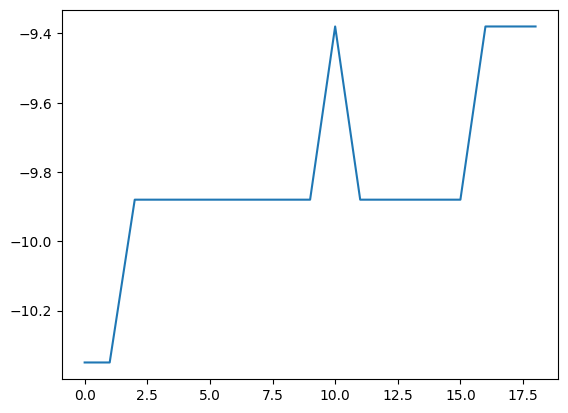

In [21]:
import pandas as pd

data = pd.read_csv(my_path, skiprows=2, delimiter="\t", na_values=["/"])
data.drop(columns=["Unnamed: 76"], inplace=True)
# data.head()

data["Pressure Water Level Sen[mm]"] = data["Pressure Water Level Sen[mm]"].str.replace(",", ".").astype(float)
data["Pressure Water Level Sen[mm]"].plot()


In [ ]:
def clean_file_before_read(file_path):
    
    